<h1 style="text-align: center;">Simulación y aplicaciones en ciencias sociales y experimentales
</h3>
<h3 style="text-align: center;"> Tema 3.1 Simulaciones de Montecarlo </h3>
<h3 style="text-align: center;"> Ejercicios</h3>

Las **simulaciones de Montecarlo** consisten en el muestro repetitivo de las variables de entrada de un  modelo y la observación del conjunto de resultados obtenidos con esos muestreos. 

En general, en un proceso de simulación de Montecarlo, se siguen los siguientes pasos: 

- *Paso 1*: Definir la distribución de las variables aleatorias de entrada. 
- *Paso 2*: Generar muestreo aleatorio de esas entradas. 
- *Paso 3*: Realizar el cálculo computacional con cada una de las muestras de las variables de entrada.
- *Paso 4*: Agregar los resultados en un resultado final. 

### Ejercicio 1

Haciendo uso de las simulaciones de Montecarlo, aproximar el número $\pi$ con cuatro cifras decimales exactas. 

**Nota**: Para eso se representa el arco del círculo unidad que se encuentra en el intervalo $I=[0,1] \times [0,1]$ y se bombardea el intervalo con valores aleatorios dentro del intervalo $I$. El área del cuarto de círculo se aproxima por el número de puntos dentro del área sobre todos los puntos dentro del intervalo. O sea, 
$$A=\frac{\hbox{no. puntos dentro del área}}{\hbox{no. puntos en $I$}}= \frac{1}{4}\pi.$$

### Ejercicio 2

Un célebre resultado matemático relacionado con las simulaciones de Montecarlo es el **Teorema Central del Límite**. Este indica que dada una muestra de $X_i$ variables independientes e idénticamente distribuidas con media $\mu$ y varianza $\sigma^2$ finita, con $i=1..n$ (e.g., $n$ simulaciones de Montecarlo de una variable aleatoria con varianza finita), entonces la media de esa muestra $\hat{\mu}= \frac{\sum_{i=1}^n X_i}{n}$ se distribuye de la siguiente manera: 

$$\hat{\mu}  \sim  N\left(\mu, \frac{\sigma}{\sqrt{n}} \right) \hbox{ cuando } n \rightarrow \infty.$$

Podemos comprobar este resultado con cualquier distribución aleatoria, tomando $m$ simulaciones de Montecarlo de la distribución, cada una de tamaño $n$. Elegir una distribución aleatoria y comprobar el Teorema Central del Límite para dos valores $n_1=100$ y $n_2=10000$, con $m=1000$.

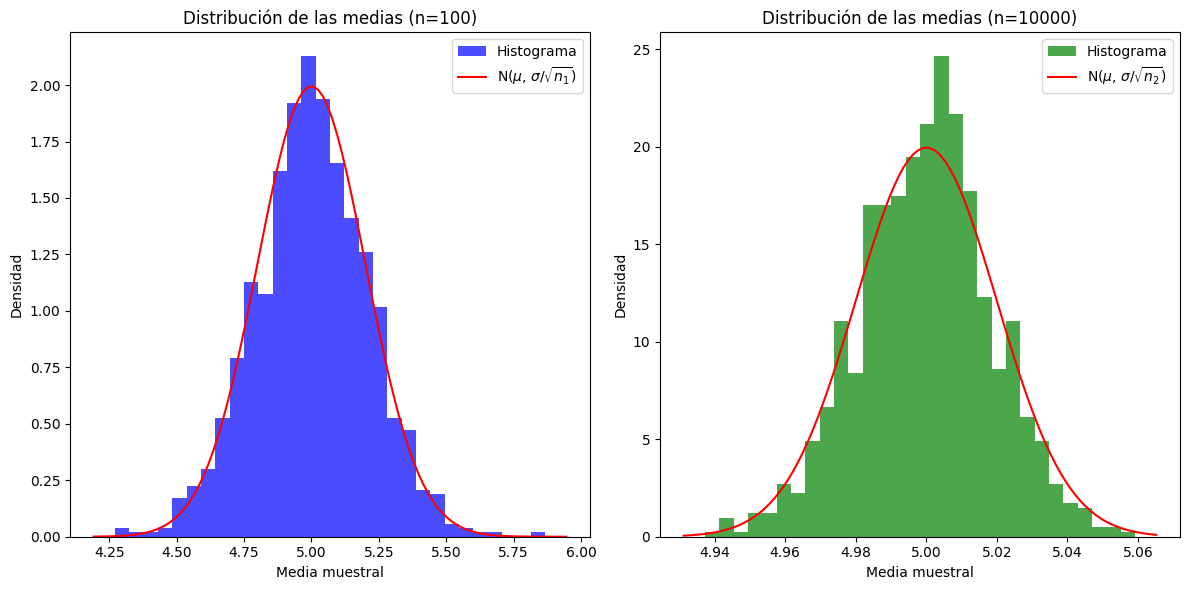

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Configuración inicial
np.random.seed(42)  # Para reproducibilidad
m = 1000  # Número de simulaciones
n1, n2 = 100, 10000  # Tamaños de las muestras
mu, sigma = 5, 2  # Parámetros de la distribución normal elegida

# Generar simulaciones de Montecarlo
means_n1 = [np.mean(np.random.normal(mu, sigma, n1)) for _ in range(m)]
means_n2 = [np.mean(np.random.normal(mu, sigma, n2)) for _ in range(m)]

# Graficar histogramas
plt.figure(figsize=(12, 6))

# Histograma para n1
plt.subplot(1, 2, 1)
plt.hist(means_n1, bins=30, density=True, alpha=0.7, color='blue', label='Histograma')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma / np.sqrt(n1)), 'r-', label='N($\mu$, $\sigma / \sqrt{n_1}$)')
plt.title(f'Distribución de las medias (n={n1})')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()

# Histograma para n2
plt.subplot(1, 2, 2)
plt.hist(means_n2, bins=30, density=True, alpha=0.7, color='green', label='Histograma')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma / np.sqrt(n2)), 'r-', label='N($\mu$, $\sigma / \sqrt{n_2}$)')
plt.title(f'Distribución de las medias (n={n2})')
plt.xlabel('Media muestral')
plt.ylabel('Densidad')
plt.legend()

plt.tight_layout()
plt.show()


### Ejercicio 3

Partimos del modelo *SIR* con una medida de inmunización. Entonces tenemos cuatro tipos de individuos, S (suceptibles), X (Infectados), R (Recuperados) e I (Inmunizados). En términos porcentuales, las ecuaciones del modelo serían las siguientes: 

$$\begin{aligned}
\frac{ds}{dt} &= -\beta s x -\delta s \\
\frac{dx}{dt} &= \beta s x - \gamma x\\
\frac{dr}{dt} &= \gamma x  \\
\frac{di}{dt} &= \delta s,\end{aligned}$$ 

donde los parámetros $\beta$, $\gamma$ y $\delta$ indican la tasa de contagio, la tasa de recuperación y la tasa de inmunización, respectivamente. La tasa de recuperación se define como $\gamma=1/T$, con $T$ el tiempo de duración de la enfermedad. 

**(a)** Tomamos un porcentaje de infectados inicial del 1%, y el resto son suceptibles. Asumimos incertidumbre en el valor de cada una de las tasas. La tasa de contagio sigue un normal con media 0.5 y desviación típica 0.1, o sea $\beta \sim N(0.5,0.1)$; el tiempo de duración de la enfermedad sigue una exponencial con media 5 días, o sea, $T \sim exp(1/5)$; y la tasa de inmunización sigue una normal $\delta \sim N(0.05, 0.02)$. Representar la **distribución de probabilidad del número máximo de infectados** y calcular la **probabilidad de que el número máximo de infectados sea mayor que 0.1**. Encontrar la **tasa media de inmunización para que esta probabilidad sea inferior al 5%**.

**(b)** Realizar un análisis de sensibilidad para cada uno de los parámetros. Para ello realizar simulaciones de Montecarlo del modelo y calcular el coeficiente de regresión lineal entre el número máximo de los infectados y cada uno de los parámetros. Indicar **un valor numérico de sensibilidad para cada uno de los tres parámetros del modelo**.  

### Apartado a)

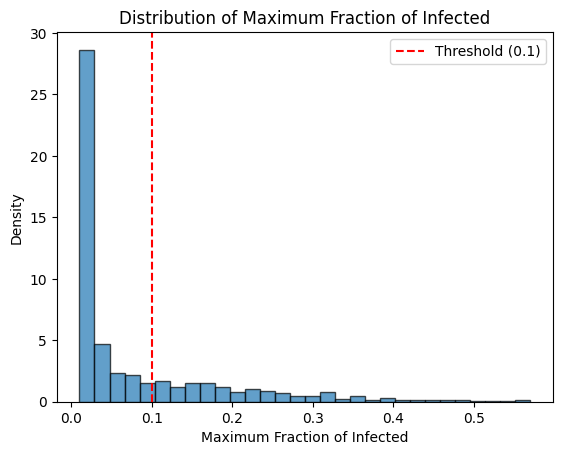

0.269

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.stats import norm, expon

# Parameters
np.random.seed(42)
n_simulations = 1000
initial_infected = 0.01  # 1% infected initially
initial_susceptible = 1 - initial_infected  # Remaining are susceptible
initial_recovered = 0
initial_immunized = 0
initial_conditions = [initial_susceptible, initial_infected, initial_recovered, initial_immunized]

# Time simulation (in days)
time = np.linspace(0, 100, 1000)

# Placeholder for results
max_infected_fractions = []

# Define the SIR model with immunization
def sir_model(y, t, beta, gamma, delta):
    s, x, r, i = y
    dsdt = -beta * s * x - delta * s
    dxdt = beta * s * x - gamma * x
    drdt = gamma * x
    didt = delta * s
    return [dsdt, dxdt, drdt, didt]

# Simulate for multiple stochastic realizations
for _ in range(n_simulations):
    # Draw stochastic parameters
    beta = np.random.normal(0.5, 0.1)
    gamma = 1 / np.random.exponential(5)
    delta = np.random.normal(0.05, 0.02)
    
    # Ensure parameters are valid (non-negative)
    beta = max(beta, 0)
    delta = max(delta, 0)
    
    # Solve ODE
    solution = odeint(sir_model, initial_conditions, time, args=(beta, gamma, delta))
    s, x, r, i = solution.T
    
    # Record maximum fraction of infected
    max_infected_fractions.append(max(x))

# Calculate the probability of max infected > 0.1
max_infected_fractions = np.array(max_infected_fractions)
prob_exceed_10_percent = np.mean(max_infected_fractions > 0.1)

# Plot the distribution of the maximum fraction of infected
plt.hist(max_infected_fractions, bins=30, density=True, alpha=0.7, edgecolor='black')
plt.axvline(0.1, color='red', linestyle='--', label='Threshold (0.1)')
plt.title("Distribution of Maximum Fraction of Infected")
plt.xlabel("Maximum Fraction of Infected")
plt.ylabel("Density")
plt.legend()
plt.show()

# Display probability of exceeding 10%
prob_exceed_10_percent


### Apartado b)

In [3]:
import numpy as np
import pandas as pd

# Number of simulations for sensitivity analysis
n_simulations = 1000

# Generate samples for each parameter
betas_sim = np.random.normal(0.5, 0.1, n_simulations)  # Transmission rate
gammas_sim = 1 / np.random.exponential(5, n_simulations)  # Recovery rate
deltas_sim = np.random.normal(0.05, 0.02, n_simulations)  # Immunization rate

# Ensure parameters are valid
betas_sim = np.maximum(betas_sim, 0)
deltas_sim = np.maximum(deltas_sim, 0)

# Placeholder for parameter values and max infected
simulation_results = []

# Simulate SIR model with varying parameters
for beta, gamma, delta in zip(betas_sim, gammas_sim, deltas_sim):
    solution = odeint(sir_model, initial_conditions, time, args=(beta, gamma, delta))
    s, x, r, i = solution.T
    max_infected = max(x)
    simulation_results.append([beta, gamma, delta, max_infected])

# Convert results to DataFrame
simulation_results_df = pd.DataFrame(
    simulation_results, columns=["Beta", "Gamma", "Delta", "Max_Infected"]
)

# Perform sensitivity analysis using linear regression
reg_betas_sim = LinearRegression().fit(simulation_results_df[["Beta"]], simulation_results_df["Max_Infected"])
reg_gammas_sim = LinearRegression().fit(simulation_results_df[["Gamma"]], simulation_results_df["Max_Infected"])
reg_deltas_sim = LinearRegression().fit(simulation_results_df[["Delta"]], simulation_results_df["Max_Infected"])

# Extract regression coefficients
sim_sensitivity_beta = reg_betas_sim.coef_[0]
sim_sensitivity_gamma = reg_gammas_sim.coef_[0]
sim_sensitivity_delta = reg_deltas_sim.coef_[0]

# Display simulation-based sensitivity results
simulation_sensitivity_df = pd.DataFrame({
    "Parameter": ["Beta (Transmission rate)", "Gamma (Recovery rate)", "Delta (Immunization rate)"],
    "Simulated Sensitivity Coefficient": [sim_sensitivity_beta, sim_sensitivity_gamma, sim_sensitivity_delta]
})

print("Simulation-Based Sensitivity Analysis Results:")
print(simulation_sensitivity_df)


NameError: name 'LinearRegression' is not defined

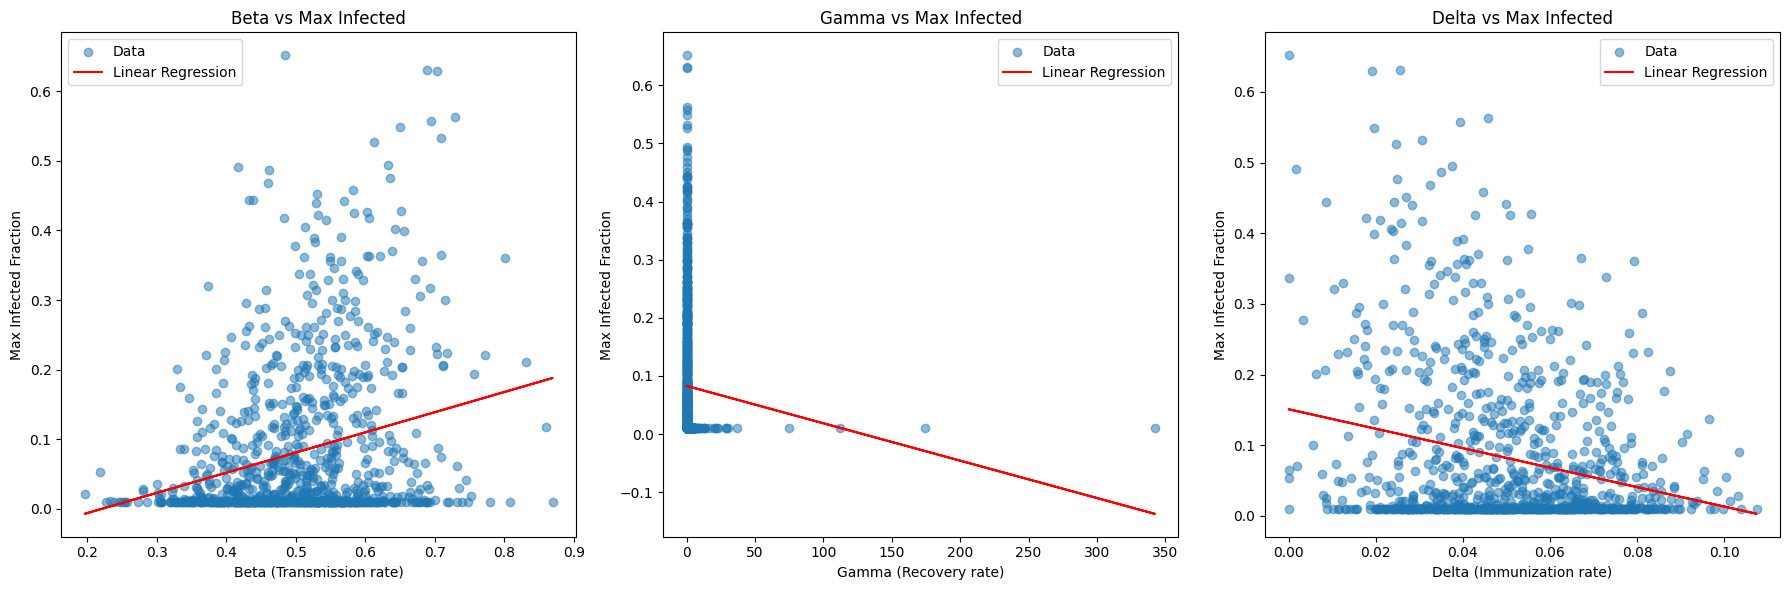

In [ ]:
# Plotting the linear regressions for sensitivity analysis
plt.figure(figsize=(18, 6))

# Beta vs Max_Infected
plt.subplot(1, 3, 1)
plt.scatter(simulation_results_df["Beta"], simulation_results_df["Max_Infected"], alpha=0.5, label="Data")
plt.plot(
    simulation_results_df["Beta"],
    reg_betas_sim.predict(simulation_results_df[["Beta"]]),
    color="red",
    label="Linear Regression",
)
plt.title("Beta vs Max Infected")
plt.xlabel("Beta (Transmission rate)")
plt.ylabel("Max Infected Fraction")
plt.legend()

# Gamma vs Max_Infected
plt.subplot(1, 3, 2)
plt.scatter(simulation_results_df["Gamma"], simulation_results_df["Max_Infected"], alpha=0.5, label="Data")
plt.plot(
    simulation_results_df["Gamma"],
    reg_gammas_sim.predict(simulation_results_df[["Gamma"]]),
    color="red",
    label="Linear Regression",
)
plt.title("Gamma vs Max Infected")
plt.xlabel("Gamma (Recovery rate)")
plt.ylabel("Max Infected Fraction")
plt.legend()

# Delta vs Max_Infected
plt.subplot(1, 3, 3)
plt.scatter(simulation_results_df["Delta"], simulation_results_df["Max_Infected"], alpha=0.5, label="Data")
plt.plot(
    simulation_results_df["Delta"],
    reg_deltas_sim.predict(simulation_results_df[["Delta"]]),
    color="red",
    label="Linear Regression",
)
plt.title("Delta vs Max Infected")
plt.xlabel("Delta (Immunization rate)")
plt.ylabel("Max Infected Fraction")
plt.legend()

plt.tight_layout()
plt.show()
